In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = '/home/eric_baldwin/ddiMain/capstone/data/satdb.csv'
satdb = pd.read_csv(file_path, encoding='latin1')

named_columns = satdb.columns[~satdb.columns.str.contains('Unnamed')]
satdb_named = satdb[named_columns]
print("Basic Information:")
print(satdb_named.info())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)            

In [4]:
print("\nSummary Statistics:")
print(satdb_named.describe(include='all'))


Summary Statistics:
       Name of Satellite, Alternate Names Current Official Name of Satellite  \
count                                6718                               6718   
unique                               6709                               6698   
top                                 MKA-1                            Jilin-1   
freq                                    2                                  5   
mean                                  NaN                                NaN   
std                                   NaN                                NaN   
min                                   NaN                                NaN   
25%                                   NaN                                NaN   
50%                                   NaN                                NaN   
75%                                   NaN                                NaN   
max                                   NaN                                NaN   

       Country/Org

In [5]:
print("\nMissing Values:")
print(satdb_named.isnull().sum())


Missing Values:
Name of Satellite, Alternate Names       0
Current Official Name of Satellite       0
Country/Org of UN Registry               0
Country of Operator/Owner                0
Operator/Owner                           0
Users                                    0
Purpose                                  0
Detailed Purpose                      5551
Class of Orbit                           0
Type of Orbit                          641
Longitude of GEO (degrees)               2
Perigee (km)                             0
Apogee (km)                              0
Eccentricity                             0
Inclination (degrees)                    0
Period (minutes)                        44
Launch Mass (kg.)                      243
 Dry Mass (kg.)                       6274
Power (watts)                         6137
Date of Launch                           0
Expected Lifetime (yrs.)              1914
Contractor                               0
Country of Contractor                

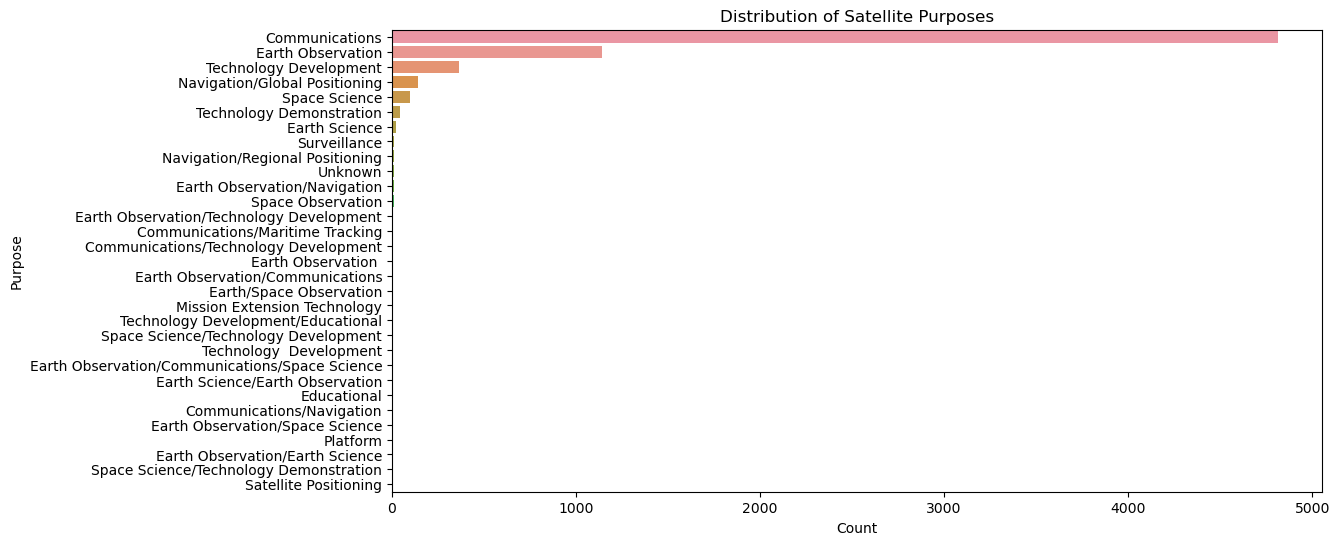

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Purpose', data=satdb_named, order=satdb_named['Purpose'].value_counts().index)
plt.title('Distribution of Satellite Purposes')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.show()

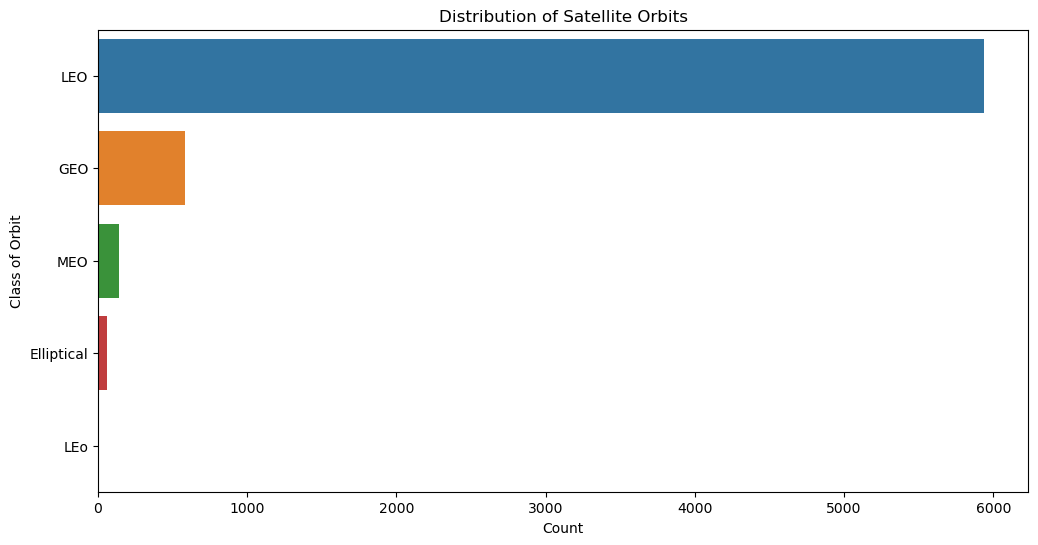

In [7]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Class of Orbit', data=satdb_named, order=satdb_named['Class of Orbit'].value_counts().index)
plt.title('Distribution of Satellite Orbits')
plt.xlabel('Count')
plt.ylabel('Class of Orbit')
plt.show()

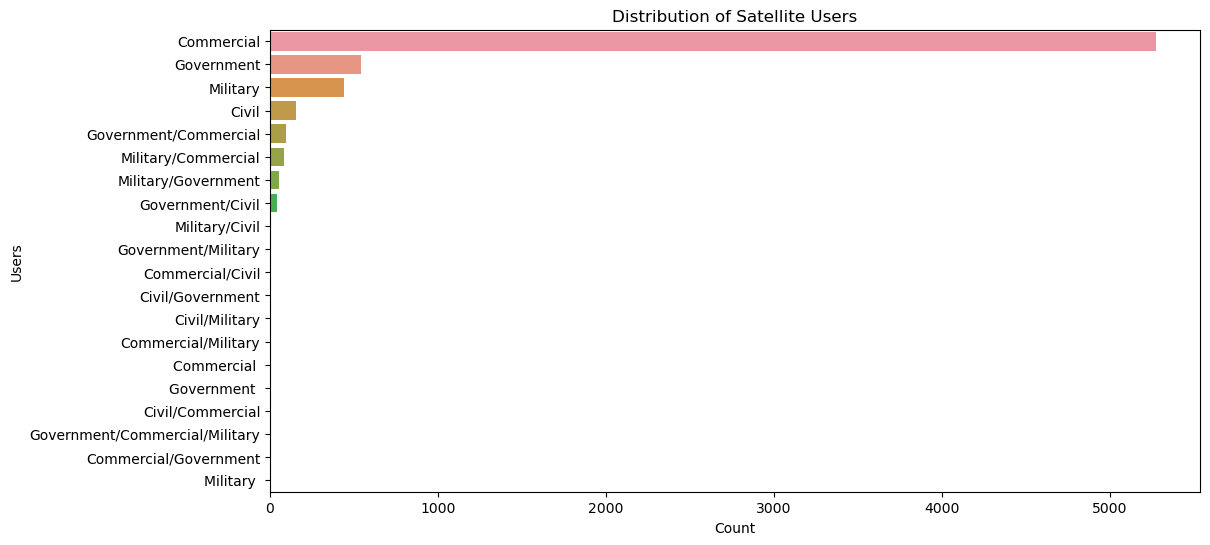

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Users', data=satdb_named, order=satdb_named['Users'].value_counts().index)
plt.title('Distribution of Satellite Users')
plt.xlabel('Count')
plt.ylabel('Users')
plt.show()

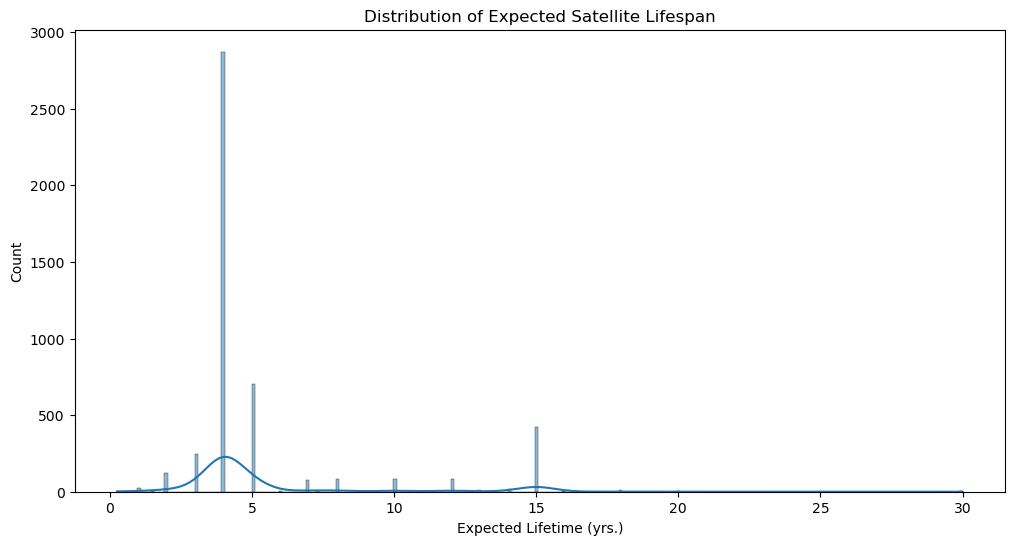

In [14]:
if 'Expected Lifetime (yrs.)' in satdb_named.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(satdb_named['Expected Lifetime (yrs.)'].dropna(), kde=True)
    plt.title('Distribution of Expected Satellite Lifespan')
    plt.xlabel('Expected Lifetime (yrs.)')
    plt.ylabel('Count')
    plt.show()

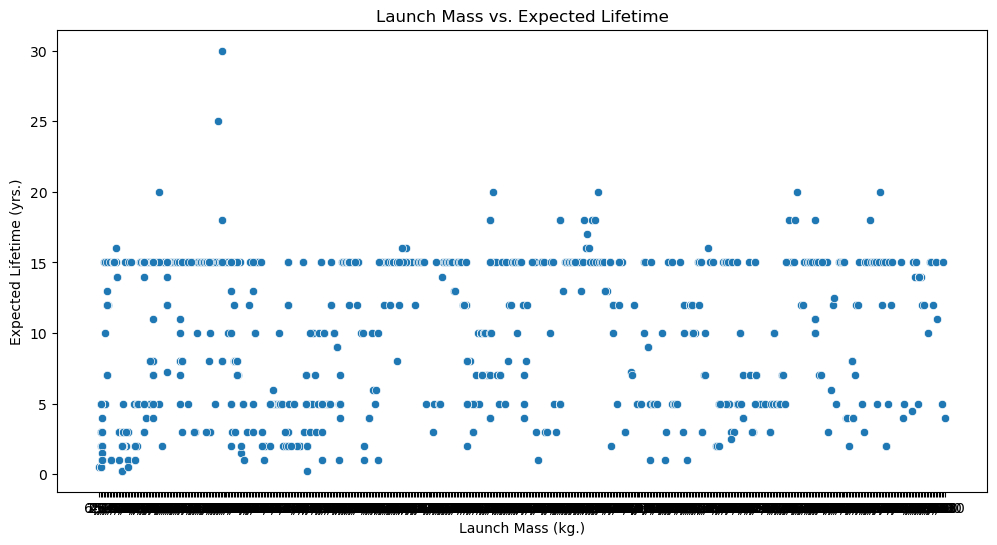

In [18]:
if 'Launch Mass (kg.)' in satdb_named.columns and 'Expected Lifetime (yrs.)' in satdb_named.columns:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(x='Launch Mass (kg.)', y='Expected Lifetime (yrs.)', data=satdb_named)
    plt.title('Launch Mass vs. Expected Lifetime')
    plt.xlabel('Launch Mass (kg.)')
    plt.ylabel('Expected Lifetime (yrs.)')
    plt.show()


In [17]:
if 'Expected Lifetime (yrs.)' in satdb_named.columns:
    correlations = satdb_named.corr()
    print("\nCorrelation Matrix:")
    print(correlations['Expected Lifetime (yrs.)'].sort_values(ascending=False))



Correlation Matrix:
Expected Lifetime (yrs.)      1.000000
Longitude of GEO (degrees)    0.081971
Eccentricity                  0.047635
NORAD Number                 -0.538066
Name: Expected Lifetime (yrs.), dtype: float64


/tmp/ipykernel_8373/2381403943.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = satdb_named.corr()


<Axes: >

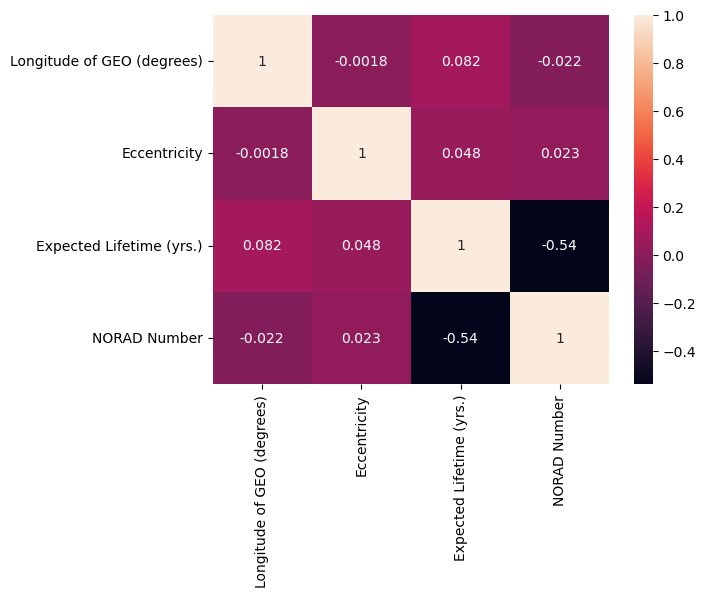

In [19]:
sns.heatmap(correlations, annot=True)

# Questions

    1. Can we predict the expected lifespan of satellites based on their launch mass, purpose, class of orbit, and users?

    2. What are the main factors affecting the lifespan of satellites?

    3. Are there any specific countries or operators that tend to have longer-lasting satellites?

    4. How does the class of orbit influence the expected lifespan of a satellite?

    5. What are the most common purposes of satellites with the longest lifespans?


